# Classification Problem
Churn => Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_excel("Churn.xlsx")
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Missing Values

In [4]:
dataset.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
dataset['TotalCharges'].fillna(dataset['TotalCharges'].mean(), inplace=True)

In [6]:
dataset = dataset.set_index('customerID')

### Value Count 

In [7]:
cat_columns = dataset[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                      'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                      'Contract', 'PaperlessBilling', 'PaymentMethod']]

In [8]:
for c in cat_columns.columns:
    print("---- %s ---" % c)
    print(cat_columns[c].value_counts())

---- gender ---
Male      3555
Female    3488
Name: gender, dtype: int64
---- Partner ---
No     3641
Yes    3402
Name: Partner, dtype: int64
---- Dependents ---
No     4933
Yes    2110
Name: Dependents, dtype: int64
---- PhoneService ---
Yes    6361
No      682
Name: PhoneService, dtype: int64
---- MultipleLines ---
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
---- InternetService ---
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
---- OnlineSecurity ---
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
---- OnlineBackup ---
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
---- DeviceProtection ---
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
---- TechSupport ---
N

In [9]:
pd.set_option("display.max_columns", 20)
dataset.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


### Data Visualization
* The distribution of various services used by customers

In [10]:
data_copy = dataset.copy()

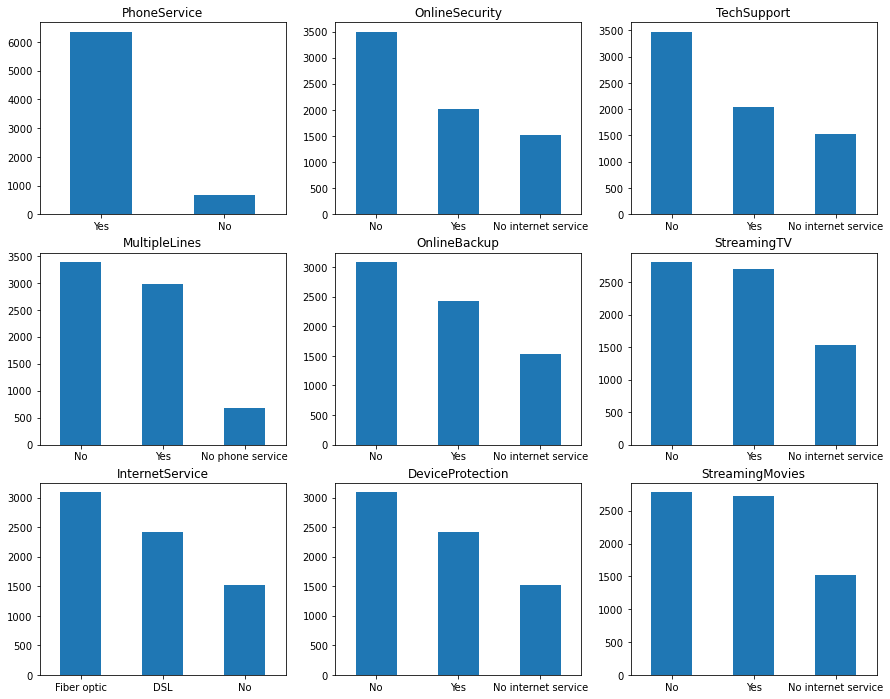

In [11]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data_copy[item].value_counts().plot(kind = 'bar',ax = axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data_copy[item].value_counts().plot(kind = 'bar',ax = axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = data_copy[item].value_counts().plot(kind = 'bar',ax = axes[i-6,2],rot = 0)
    ax.set_title(item)

Observation : 

              1) In InternetService Fiber Obtics is the most preffered choice
              
              2) Phone Service is highest used service by the Customers
              
              3) Least used services are : OnlineSecurity & TechSupport
              
              
              
* Which service has highest churning customers

In [12]:
telecom_churn_services = data_copy[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies',
                                        'TechSupport', 'StreamingTV', 'OnlineBackup', 'Churn']]

telecom_churn_services.replace(to_replace='Yes', value=1, inplace=True)
telecom_churn_services.replace(to_replace='No', value=0, inplace=True)

telecom_churn_services = telecom_churn_services[telecom_churn_services.OnlineSecurity !='No internet service'] 

agg = telecom_churn_services.groupby('Churn', as_index=False)[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies',
                                                               'TechSupport', 'StreamingTV', 'OnlineBackup']].sum()

C:\Users\gkhat\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Text(0.5, 1.0, 'Which Service Customers Churn Higher')

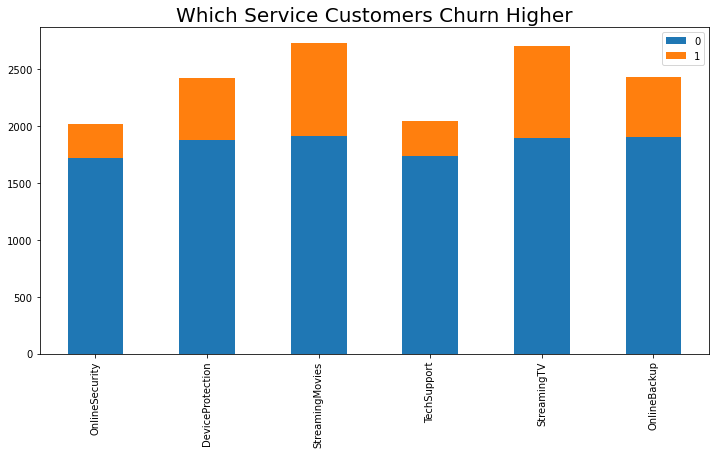

In [13]:
ax = agg.set_index('Churn').T.plot(kind = 'bar', stacked = True, figsize = (12,6))
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc ='best')
ax.set_title('Which Service Customers Churn Higher', fontsize = 20)

Observation : 

            1) Customers who are using StreamingMovies and StreamingTV are churning in higher proportions
            
            
* Impact of Tenure on Churn

Text(0.5, 0, 'Churn')

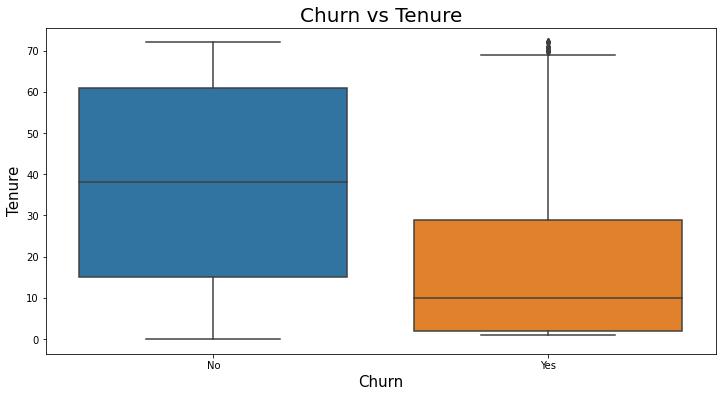

In [14]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x ='Churn', y = 'tenure', data = data_copy)
ax.set_title('Churn vs Tenure', fontsize = 20)
ax.set_ylabel('Tenure', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

Text(0.5, 0, 'Tenure in Months')

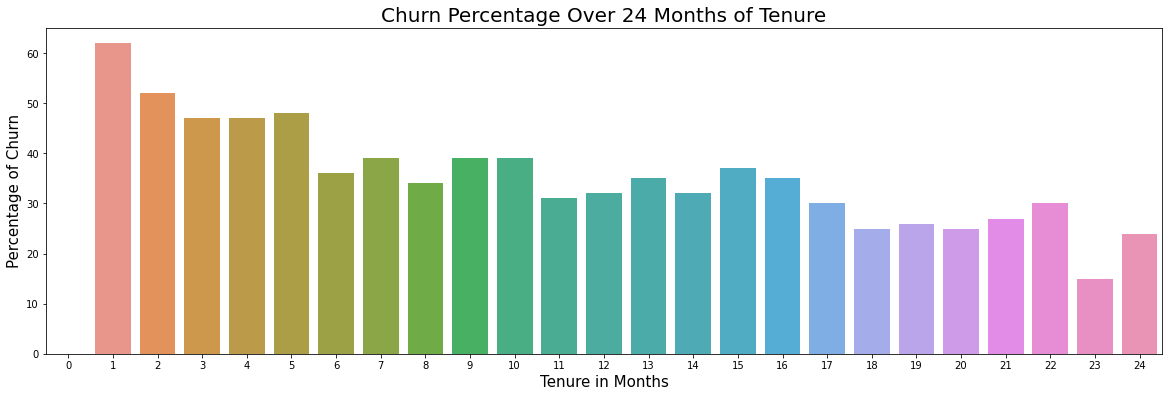

In [15]:
agg = data_copy.replace('Yes', 1).replace('No', 0).groupby('tenure', as_index = False)[['Churn']].mean()
agg = agg[agg.tenure < 25]
agg['Churn'] = np.round(agg['Churn'], 2) * 100

plt.figure(figsize = (20,6))

ax = sns.barplot(x = 'tenure', y = 'Churn', data = agg)
ax.set_title('Churn Percentage Over 24 Months of Tenure', fontsize = 20)
ax.set_ylabel('Percentage of Churn', fontsize = 15)
ax.set_xlabel('Tenure in Months', fontsize = 15)   

Observations : 
            
            1) Shorter the tenure, higher is the possibility of Customer Churning
            2) Over 60 percent of customers who complete one month of tenure Churn. 
            3) As the length of tenure increases Churn reduces to about 25 percent at 24th month. 
            
* Impact of Contract on Customer Churn

Text(0.5, 0, 'Churn')

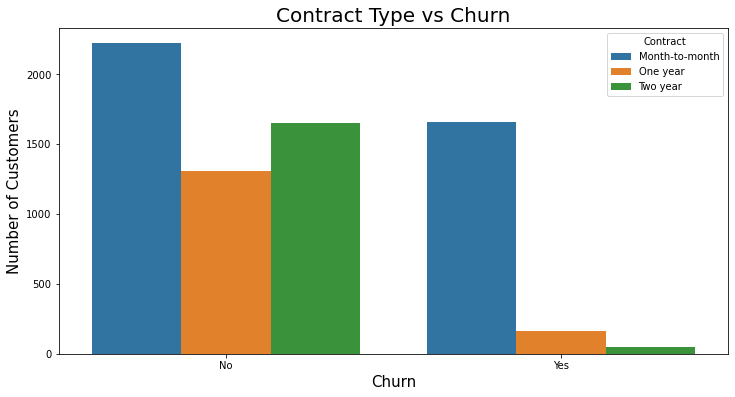

In [16]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = "Churn", hue = "Contract", data = data_copy);
ax.set_title('Contract Type vs Churn', fontsize = 20)
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

Observations : 

          1) Customers with Month-to-Month contract are churning more, while two year contract customers are churning least
              
              
* Impact of PaymentMethod on Customer Churn

Text(0.5, 1.0, 'Churn by Payment Method')

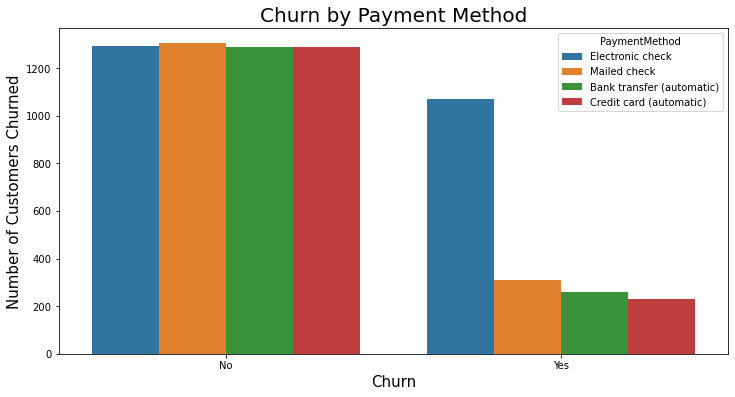

In [17]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = "Churn", hue = "PaymentMethod", data = data_copy);
ax.set_ylabel('Number of Customers Churned', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
ax.set_title('Churn by Payment Method', fontsize = 20)

Observtions : 

            1) Customers with Electronic Check as mode of payment are churning in higher proportion
            
            
* Number of customers using which payment method

Text(0.5, 1.0, 'Customers by Payment Method')

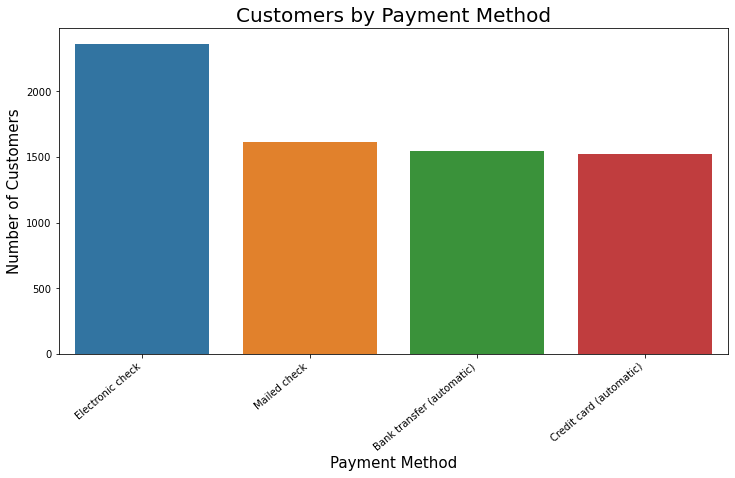

In [18]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = "PaymentMethod", data = data_copy);

ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Payment Method', fontsize = 15)

ax.set_title('Customers by Payment Method', fontsize = 20)

Observations : 


            1) Customers mostly prefer the Electronic Check as their PaymentMethod
            
            
* Impact of MultipleLines on Customer Churning

Text(0.5, 1.0, 'Churn by Multiple Lines')

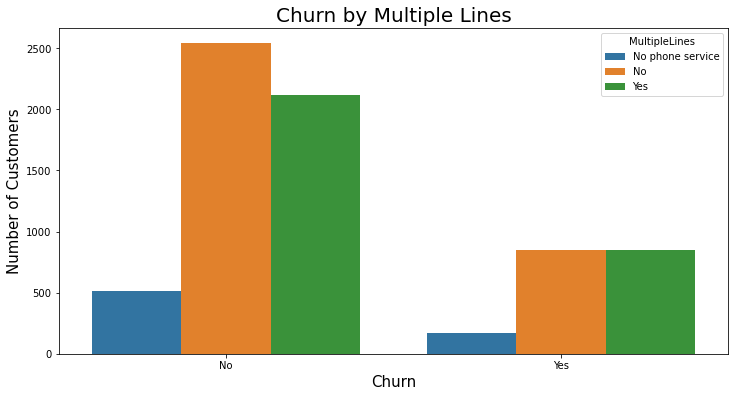

In [19]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x = "Churn", hue = "MultipleLines", data = data_copy);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

ax.set_title('Churn by Multiple Lines', fontsize = 20)

* Impact of Online Security on Customer Churning

Text(0.5, 1.0, 'Churn by Online Security Service')

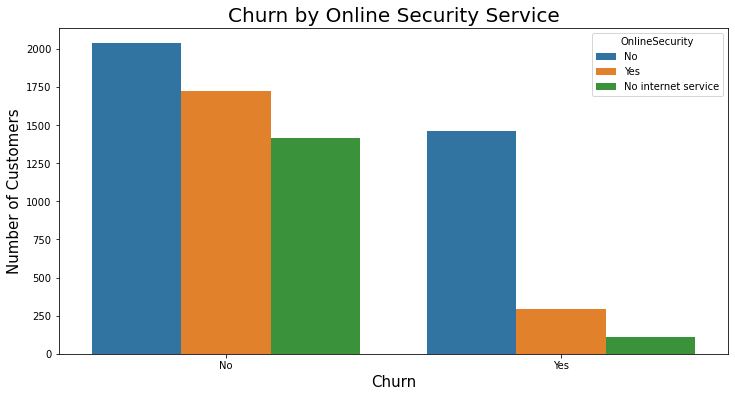

In [20]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = "Churn", hue = "OnlineSecurity", data = data_copy);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

ax.set_title('Churn by Online Security Service', fontsize = 20)

* Percentage of Senior Citizens Churning 

Text(0.5, 1.0, 'Percentage of Senior Citizens Churning')

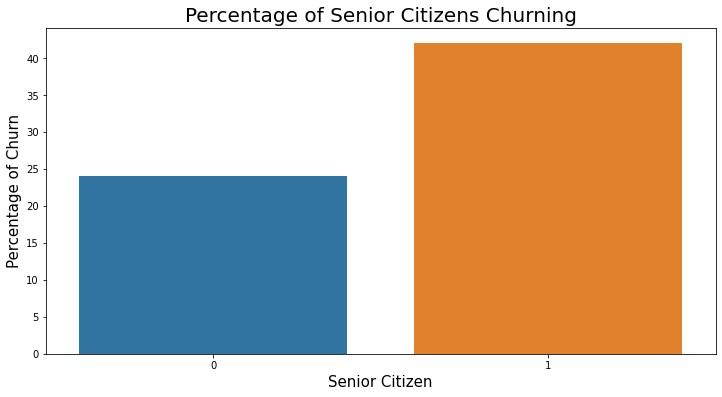

In [21]:
agg = data_copy.replace('Yes', 1).replace('No', 0).groupby('SeniorCitizen', as_index = False)[['Churn']].sum()

agg.iloc[0,1] = round(agg.iloc[0,1]/data_copy[data_copy.SeniorCitizen == 0].shape[0], 2) * 100
agg.iloc[1,1] = round(agg.iloc[1,1]/data_copy[data_copy.SeniorCitizen == 1].shape[0], 2) * 100

plt.figure(figsize = (12,6))
ax = sns.barplot(x = 'SeniorCitizen', y ='Churn', data = agg)
ax.set_ylabel('Percentage of Churn', fontsize = 15)
ax.set_xlabel('Senior Citizen', fontsize = 15)

ax.set_title('Percentage of Senior Citizens Churning', fontsize = 20)

* Impact of Gender on churn

Text(0.5, 1.0, 'Churn By Gender')

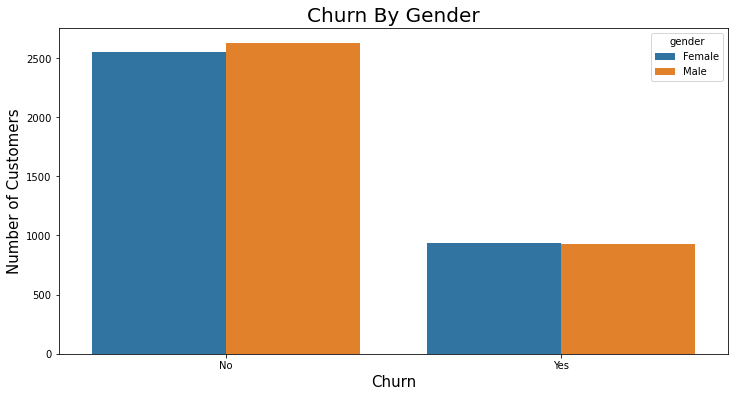

In [22]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = "Churn", hue = "gender", data = data_copy);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

ax.set_title('Churn By Gender', fontsize = 20)

* Impact of Dependents on Churn

Text(0.5, 1.0, 'Churn By Dependents')

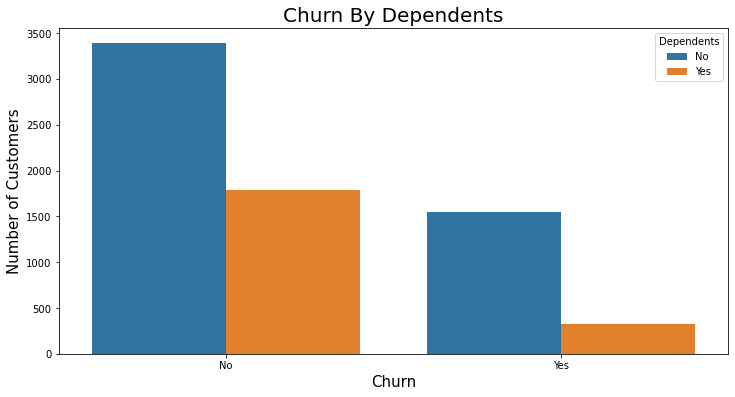

In [23]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = "Churn", hue = "Dependents", data = data_copy);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

ax.set_title('Churn By Dependents', fontsize = 20)

Observations : 


            1) Customers without Dependents are more likely to churn
            
            
* Impact of Partner on Churn

Text(0.5, 1.0, 'Churn By Partner')

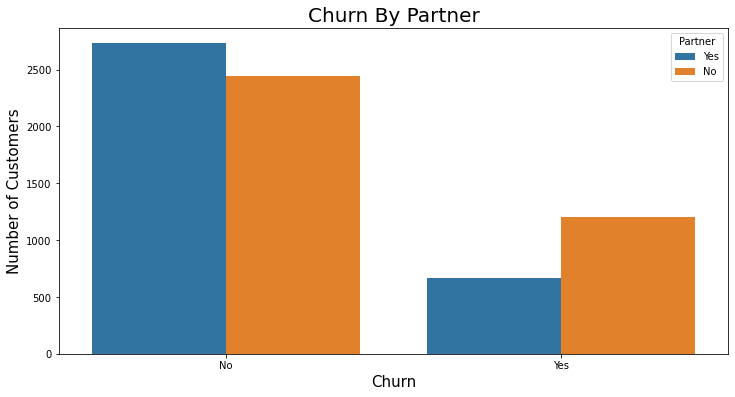

In [24]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = "Churn", hue = "Partner", data = data_copy);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

ax.set_title('Churn By Partner', fontsize = 20)

Observations :

            1) Customers who are not partners are more likely to churn

### Scaling the Numerical Columns

In [25]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cols = ['InternetService', 'Contract', 'PaymentMethod']

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

dataset[num_cols] = scaler.fit_transform(dataset[num_cols])

### Encoding 
* LABEL ENCODING

In [27]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
le_cols = dataset[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity','OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']]

for c in le_cols.columns:
    dataset[c] = LE.fit_transform(dataset[c])

* get_dummies

In [28]:
a = pd.get_dummies(dataset[cols])
dataset = pd.concat([dataset, a], axis = 1)
dataset.drop(dataset[cols], axis = 1, inplace = True)

In [29]:
dataset.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,-1.277445,0,1,0,2,0,...,1,0,0,1,0,0,0,0,1,0
5575-GNVDE,1,0,0,0,0.066327,1,0,2,0,2,...,1,0,0,0,1,0,0,0,0,1
3668-QPYBK,1,0,0,0,-1.236724,1,0,2,2,0,...,1,0,0,1,0,0,0,0,0,1
7795-CFOCW,1,0,0,0,0.514251,0,1,2,0,2,...,1,0,0,0,1,0,1,0,0,0
9237-HQITU,0,0,0,0,-1.236724,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
9305-CDSKC,0,0,0,0,-0.992402,1,2,0,0,2,...,0,1,0,1,0,0,0,0,1,0
1452-KIOVK,1,0,0,1,-0.422317,1,2,0,2,0,...,0,1,0,1,0,0,0,1,0,0
6713-OKOMC,0,0,0,0,-0.910961,0,1,2,0,0,...,1,0,0,1,0,0,0,0,0,1
7892-POOKP,0,0,1,0,-0.177995,1,2,0,0,2,...,0,1,0,1,0,0,0,0,1,0


### Splitting the Dataset

In [30]:
X = dataset.drop("Churn",axis=1)
y = dataset["Churn"]

In [31]:
X.shape, y.shape

((7043, 26), (7043,))

In [32]:
X_train = X.iloc[:4000, :]
X_test = X.iloc[4000:, :]

In [33]:
y_train = y.iloc[:4000, ]
y_test = y.iloc[4000:, ]

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 26), (3043, 26), (4000,), (3043,))

In [35]:
dataset['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Feature Selection

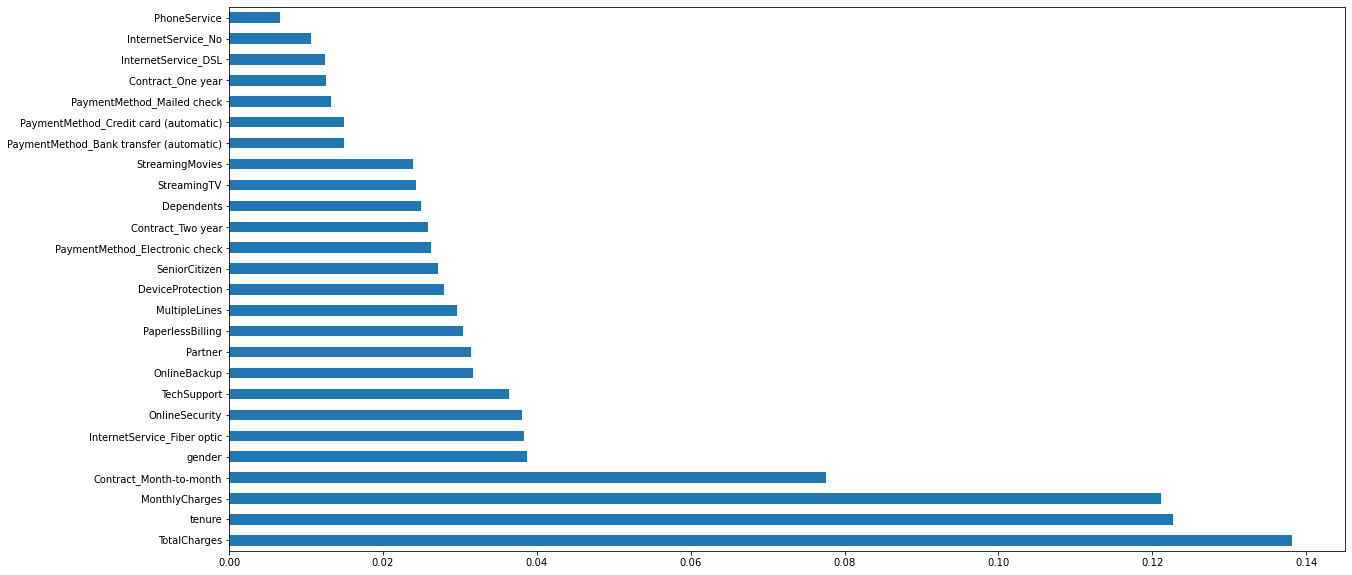

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
 
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

plt.figure(figsize = (20,10))
ranked_features = pd.Series(etc.feature_importances_, index = X.columns)
ranked_features.nlargest(26).plot(kind = 'barh')
plt.show()

<AxesSubplot:>

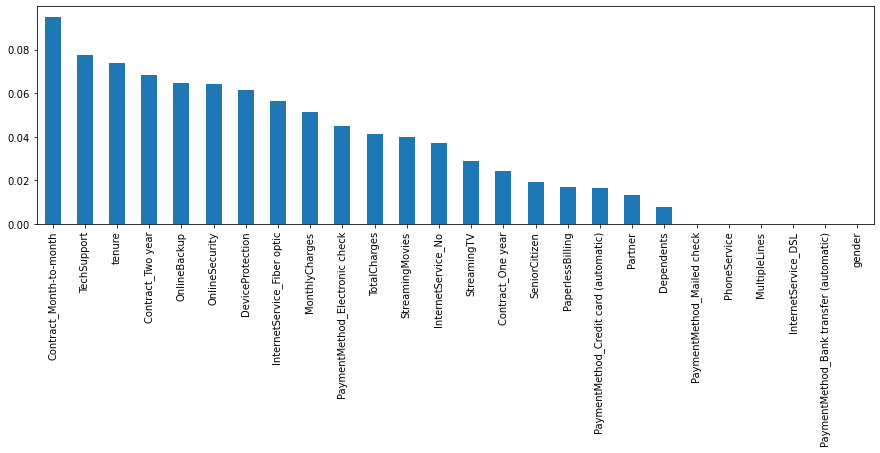

In [37]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns

mutual_info.sort_values(ascending = False)
mutual_info.sort_values(ascending = False).plot.bar(figsize = (15, 4))

In [38]:
from sklearn.feature_selection import SelectKBest

sel_top_cols = SelectKBest(mutual_info_classif, k=20)
sel_top_cols.fit(X_train, y_train)
X_train.columns[sel_top_cols.get_support()]

Index(['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

### Model Building
* Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

# Prediction on test data
y_pred = logreg.predict(X_test)

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import classification_report
print("Train Accuracy:", logreg.score(X_train, y_train))
lr_acc = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Accuracy: 0.80425
0.8054551429510352
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      2231
         Yes       0.67      0.54      0.60       812

    accuracy                           0.81      3043
   macro avg       0.76      0.72      0.74      3043
weighted avg       0.80      0.81      0.80      3043



### Hyperparameter Tuning
* RANDOM FOREST CLASSIFIER 

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
CV_rfc = GridSearchCV(rf, parameters)
CV_rfc = CV_rfc.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rfc = CV_rfc.best_estimator_

# Train the model using the training sets 
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       n_estimators=15)

In [42]:
y_pred = rfc.predict(X_test)
print("Train Accuracy:", rfc.score(X_train, y_train))

Train Accuracy: 0.8115


In [43]:
rf_acc = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7962536970095301
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      2231
         Yes       0.66      0.49      0.56       812

    accuracy                           0.80      3043
   macro avg       0.74      0.70      0.71      3043
weighted avg       0.78      0.80      0.79      3043



* SUPPORT VECTOR CLASSIFIER

In [44]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

svc = SVC(probability=True)

C = [0, 1, 10, 100]
kernel = ['rbf', 'poly', 'linear', 'sigmoid']
degree = [1, 2, 3, 4, 5, 6]
                    
param_grid = {'C' : C, 
              'kernel' : kernel, 
              'degree' : degree}

CV_svc = GridSearchCV(svc, param_grid = param_grid, cv = 3)
CV_svc.fit(X_train, y_train)

svc = CV_svc.best_estimator_

svc.fit(X_train,y_train)

SVC(C=1, degree=1, kernel='poly', probability=True)

In [45]:
y_pred = svc.predict(X_test)
print("Train Accuracy:", svc.score(X_train, y_train))
svc_acc = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Accuracy: 0.8025
0.7936247124548144
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      2231
         Yes       0.64      0.52      0.57       812

    accuracy                           0.79      3043
   macro avg       0.74      0.71      0.72      3043
weighted avg       0.78      0.79      0.79      3043



* KNN Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

CV_knn = GridSearchCV(knn, parameters)
CV_knn = CV_knn.fit(X_train, y_train)

knn = CV_knn.best_estimator_

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, n_neighbors=10)

In [47]:
y_pred = knn.predict(X_test)
print("Train Accuracy:", knn.score(X_train, y_train))
knn_acc = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Accuracy: 0.818
0.7719355898784095
              precision    recall  f1-score   support

          No       0.81      0.90      0.85      2231
         Yes       0.60      0.42      0.50       812

    accuracy                           0.77      3043
   macro avg       0.71      0.66      0.68      3043
weighted avg       0.76      0.77      0.76      3043



* Decision Tree

In [48]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier()

parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

CV_dt = GridSearchCV(dt, parameters)
CV_dt = CV_dt.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt = CV_dt.best_estimator_

# Train the model using the training sets 
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=10,
                       min_samples_split=100)

In [49]:
y_pred = dt.predict(X_test)
print("Train Accuracy:", dt.score(X_train, y_train))
dt_acc = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Accuracy: 0.8055
0.7762076897798226
              precision    recall  f1-score   support

          No       0.82      0.90      0.85      2231
         Yes       0.61      0.45      0.52       812

    accuracy                           0.78      3043
   macro avg       0.71      0.67      0.68      3043
weighted avg       0.76      0.78      0.76      3043



* GaussianNB

In [50]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

In [51]:
print("Train Accuracy : ", gnb.score(X_train, y_train))
gnb_acc = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Accuracy :  0.73975
0.7305290831416366
              precision    recall  f1-score   support

          No       0.90      0.72      0.80      2231
         Yes       0.50      0.77      0.60       812

    accuracy                           0.73      3043
   macro avg       0.70      0.74      0.70      3043
weighted avg       0.79      0.73      0.74      3043



* Neural Network

In [52]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print("Train Accuracy : ", mlp.score(X_train, y_train))
mlp_acc = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Accuracy :  0.866
0.7752218205718041
              precision    recall  f1-score   support

          No       0.82      0.89      0.85      2231
         Yes       0.60      0.47      0.53       812

    accuracy                           0.78      3043
   macro avg       0.71      0.68      0.69      3043
weighted avg       0.76      0.78      0.77      3043



* Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

# print("Train Accuracy", gb.score(y_test, y_pred))
gb_acc = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7998685507722643
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      2231
         Yes       0.66      0.52      0.58       812

    accuracy                           0.80      3043
   macro avg       0.75      0.71      0.73      3043
weighted avg       0.79      0.80      0.79      3043



In [59]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)
y_pred = model.predict(X_test)

xgb_acc = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[21:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7840946434439697
              precision    recall  f1-score   support

          No       0.83      0.88      0.86      2231
         Yes       0.62      0.51      0.56       812

    accuracy                           0.78      3043
   macro avg       0.72      0.70      0.71      3043
weighted avg       0.77      0.78      0.78      3043



In [61]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machines','K - Nearest Neighbors', 
              'Naive Bayes', 'Decision Tree', 'MLP', 'Gradient Boost Classifier', 'XGBoost'],
    'Score': [lr_acc, rf_acc, svc_acc, knn_acc, gnb_acc, dt_acc, mlp_acc, gb_acc, xgb_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.805455
7,Gradient Boost Classifier,0.799869
1,Random Forest,0.796254
2,Support Vector Machines,0.793625
8,XGBoost,0.784095
5,Decision Tree,0.776208
6,MLP,0.775222
3,K - Nearest Neighbors,0.771936
4,Naive Bayes,0.730529


Churn being one of the biggest problem in the telecommunication industry it is definitely bad for the firm. 
Different methods need to be implemented in order to stop from customers to churn. As we saw from the above graphs there are multiple things that need to be changed / implemented. The best way to avoid customer churn is for a company to truly know the customer needs. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. 